# Clean the black lenslet images

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from utils import load_images, save_image, display_image, display_image_with_mla_grid

In [2]:
lf_final_dir = os.path.join('data', 'lf_processed_final')
cropped_dir = os.path.join(lf_final_dir, 'cropped_02_15_65_65')
cleaned_dir = os.path.join(lf_final_dir, 'cleaned')

In [3]:
images = load_images(cropped_dir)
pix_per_lenslet = 16

## Identify lenslet to zero out

In [4]:
def display_image_with_mla_grid_and_x_marks(image_array, pix_per_lenslet, marked_combinations, title='Image with MLA Grid and X Marks'):
    """
    Display an image with an MLA grid and place a red 'X' over specified regions.
    
    Parameters:
        image_array (numpy.array): The image array.
        pix_per_lenslet (int): The number of pixels per lenslet square.
        marked_combinations (list of tuples): List of (i, j) tuples specifying which regions to mark with an 'X'.
        title (str): Title for the plot.
    """
    plt.imshow(image_array, cmap='gray')
    height, width = image_array.shape
    
    # Draw the grid
    for i in range(0, height, pix_per_lenslet):
        plt.hlines(i, xmin=0, xmax=width, colors='red', linestyles='dashed', linewidths=0.5)
    for j in range(0, width, pix_per_lenslet):
        plt.vlines(j, ymin=0, ymax=height, colors='red', linestyles='dashed', linewidths=0.5)
    
    # Draw a red 'X' on specified grid regions
    for i, j in marked_combinations:
        start_x = j * pix_per_lenslet
        start_y = i * pix_per_lenslet
        end_x = start_x + pix_per_lenslet
        end_y = start_y + pix_per_lenslet
        
        # Draw lines from corner to corner
        plt.plot([start_x, end_x], [start_y, end_y], color='red', linewidth=2)  # From top-left to bottom-right
        plt.plot([start_x, end_x], [end_y, start_y], color='red', linewidth=2)  # From bottom-left to top-right

    plt.title(title)
    plt.axis('off')
    plt.show()

In [5]:
retardance = images[1]

### Calculate indicies from a function

In [6]:
def average_intensity_per_lenslet(image_array, pix_per_lenslet):
    """
    Calculate the average intensity across each lenslet region in an image.
    
    Parameters:
        image_array (numpy.array): The image array.
        pix_per_lenslet (int): The number of pixels per lenslet (assuming square lenslets).
    
    Returns:
        numpy.array: A 2D array with the average intensity values of each lenslet.
    """
    height, width = image_array.shape
    # Determine the number of lenslets along each dimension
    num_lenslets_y = height // pix_per_lenslet
    num_lenslets_x = width // pix_per_lenslet
    
    # Initialize an array to store the average intensities
    lenslet_averages = np.zeros((num_lenslets_y, num_lenslets_x))
    
    # Iterate over each block
    for i in range(num_lenslets_y):
        for j in range(num_lenslets_x):
            # Calculate the start and end indices of the lenslet in the image
            start_y = i * pix_per_lenslet
            end_y = start_y + pix_per_lenslet
            start_x = j * pix_per_lenslet
            end_x = start_x + pix_per_lenslet
            
            # Extract the lenslet region
            lenslet_region = image_array[start_y:end_y, start_x:end_x]
            
            # Calculate the average intensity of the lenslet
            lenslet_averages[i, j] = np.mean(lenslet_region)
    
    return lenslet_averages

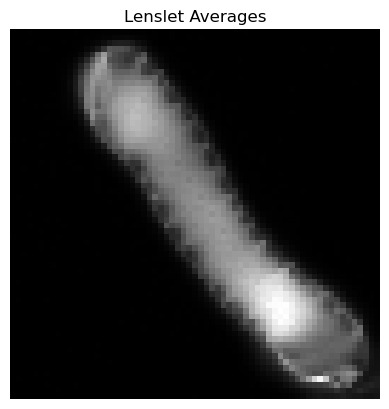

In [7]:
ret_lenslet_averages = average_intensity_per_lenslet(retardance, pix_per_lenslet)
display_image(ret_lenslet_averages, title='Lenslet Averages')

In [8]:
ret_lenslet_averages.shape
print(f"max: {np.max(ret_lenslet_averages)}, min: {np.min(ret_lenslet_averages)}")

max: 28191.25390625, min: 224.3671875


In [9]:
threshold = 400
indices = np.where(ret_lenslet_averages < threshold)
list_of_indices = list(zip(indices[0], indices[1]))
print(f"Identified {len(list_of_indices)}/{ret_lenslet_averages.size} lenslets with average intensity less than {threshold}.")

Identified 2668/4225 lenslets with average intensity less than 400.


In [10]:
def plot_red_x_on_image(image, indices):
    """
    Plot an image and mark a red 'X' on specified indices.

    Parameters:
        image (np.array): The image array.
        indices (list of tuples): List of (row, column) indices to mark with an 'X'.
    """
    plt.imshow(image, cmap='gray')  # Display the image in grayscale
    for (row, col) in indices:
        # Draw a red 'X' at the specified index
        # Define the size of the 'X'
        offset = 5  # Size of the 'X'
        # Draw the 'X'
        plt.plot([col - offset, col + offset], [row - offset, row + offset], color='red', marker='x', markersize=10)
        plt.plot([col - offset, col + offset], [row + offset, row - offset], color='red', marker='x', markersize=10)

    plt.axis('off')  # Turn off axis labels
    plt.show()

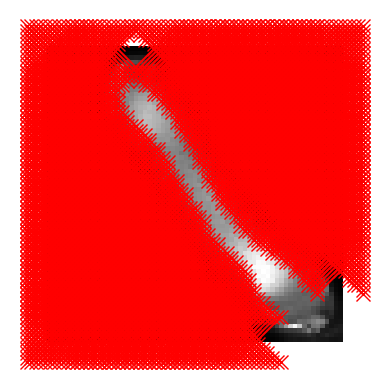

In [11]:
plot_red_x_on_image(ret_lenslet_averages, list_of_indices)

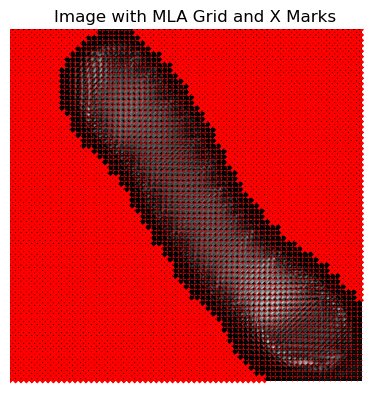

In [12]:
display_image_with_mla_grid_and_x_marks(retardance, pix_per_lenslet, list_of_indices)

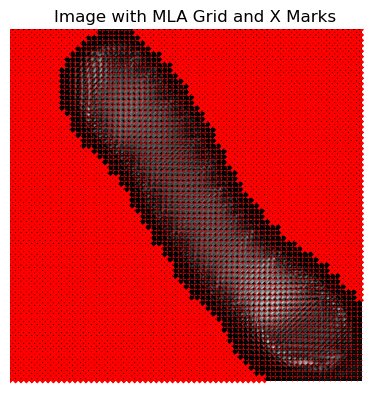

In [13]:
display_image_with_mla_grid_and_x_marks(retardance, pix_per_lenslet, list_of_indices)

## Try with large pre-cropped images

In [14]:
masked_dir = os.path.join(lf_final_dir, 'masked')
masked_images = load_images(masked_dir)
masked_retardance = masked_images[1]

### Entire image

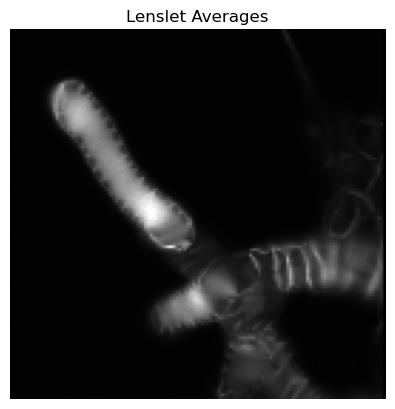

In [15]:
ret_all_lenslet_averages = average_intensity_per_lenslet(masked_retardance, pix_per_lenslet)
display_image(ret_all_lenslet_averages, title='Lenslet Averages')

In [16]:
threshold = 400
indices = np.where(ret_all_lenslet_averages < threshold)
list_of_indices = list(zip(indices[0], indices[1]))
print(f"Identified {len(list_of_indices)}/{ret_all_lenslet_averages.size} lenslets with average intensity less than {threshold}.")

Identified 10772/17160 lenslets with average intensity less than 400.


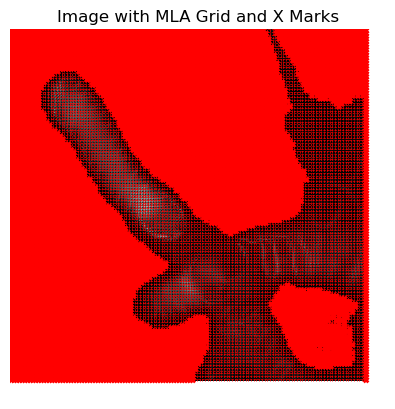

In [17]:
display_image_with_mla_grid_and_x_marks(masked_retardance, pix_per_lenslet, list_of_indices)

### In-between size

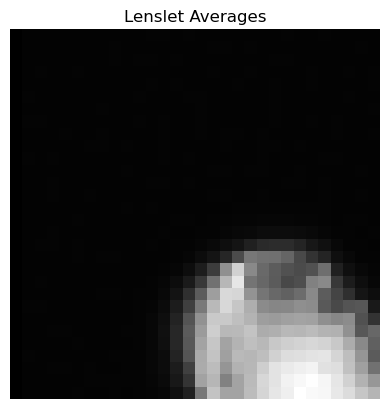

In [18]:
retardance_portion = masked_retardance[0:16*30, 0:16*30]
ret_portion_lenslet_averages = average_intensity_per_lenslet(retardance_portion, pix_per_lenslet)
display_image(ret_portion_lenslet_averages, title='Lenslet Averages')

Identified 652/900 lenslets with average intensity less than 400.


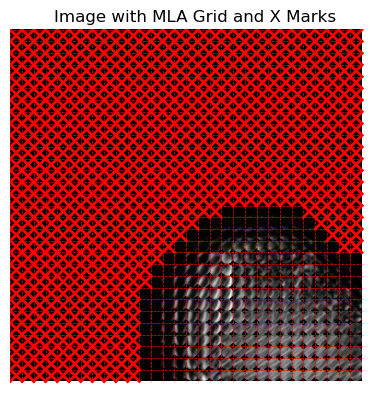

In [19]:
threshold = 400
indices = np.where(ret_portion_lenslet_averages < threshold)
list_of_indices = list(zip(indices[0], indices[1]))
print(f"Identified {len(list_of_indices)}/{ret_portion_lenslet_averages.size} lenslets with average intensity less than {threshold}.")
display_image_with_mla_grid_and_x_marks(retardance_portion, pix_per_lenslet, list_of_indices)

Takeaway: cropped should possibly be a little more generous on the top end

### Original cropping top area

Identified 19/900 lenslets with average intensity less than 400.


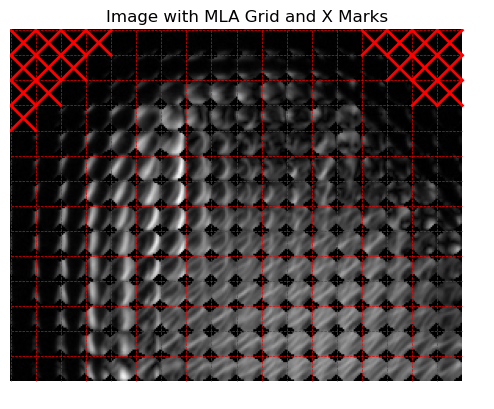

In [20]:
retardance_top_portion = masked_retardance[16*16:16*30, 16*12:16*30]
ret_top_portion_lenslet_averages = average_intensity_per_lenslet(retardance_top_portion, pix_per_lenslet)
# display_image(ret_top_portion_lenslet_averages, title='Lenslet Averages')
threshold = 400
indices = np.where(ret_top_portion_lenslet_averages < threshold)
list_of_indices = list(zip(indices[0], indices[1]))
print(f"Identified {len(list_of_indices)}/{ret_portion_lenslet_averages.size} lenslets with average intensity less than {threshold}.")
display_image_with_mla_grid_and_x_marks(retardance_top_portion, pix_per_lenslet, list_of_indices)

### Modified cropping top area

Identified 72/320 lenslets with average intensity less than 400.


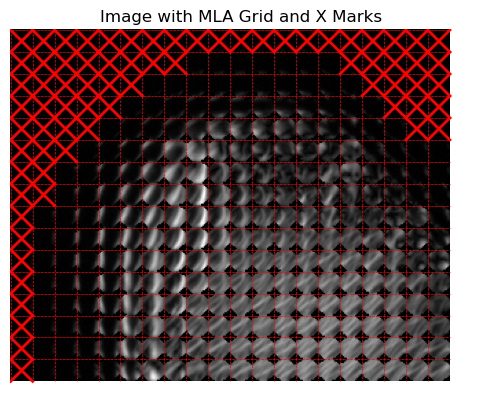

In [21]:
retardance_top_portion = masked_retardance[16*14:16*30, 16*10:16*30]
ret_top_portion_lenslet_averages = average_intensity_per_lenslet(retardance_top_portion, pix_per_lenslet)
threshold = 400
indices = np.where(ret_top_portion_lenslet_averages < threshold)
list_of_indices = list(zip(indices[0], indices[1]))
print(f"Identified {len(list_of_indices)}/{ret_top_portion_lenslet_averages.size} lenslets with average intensity less than {threshold}.")
display_image_with_mla_grid_and_x_marks(retardance_top_portion, pix_per_lenslet, list_of_indices)

Takeaway: top corner should start at x-microlens idx 11 and y-microlens idx 15

### Bottom cropping area

Entire area to then zoom in on:

Identified 2083/3640 lenslets with average intensity less than 400.


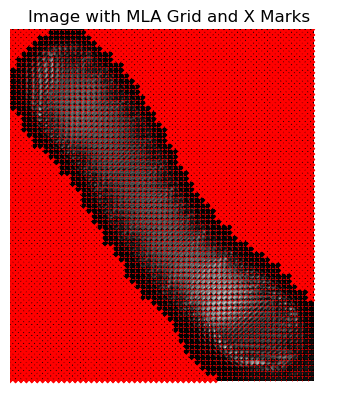

In [22]:
retardance_bottom_portion = masked_retardance[16*15:16*(15+65), 16*11:16*(11+56)]
ret_bottom_portion_lenslet_averages = average_intensity_per_lenslet(retardance_bottom_portion, pix_per_lenslet)
threshold = 400
indices = np.where(ret_bottom_portion_lenslet_averages < threshold)
list_of_indices = list(zip(indices[0], indices[1]))
print(f"Identified {len(list_of_indices)}/{ret_bottom_portion_lenslet_averages.size} lenslets with average intensity less than {threshold}.")
display_image_with_mla_grid_and_x_marks(retardance_bottom_portion, pix_per_lenslet, list_of_indices)

Identified 85/650 lenslets with average intensity less than 400.


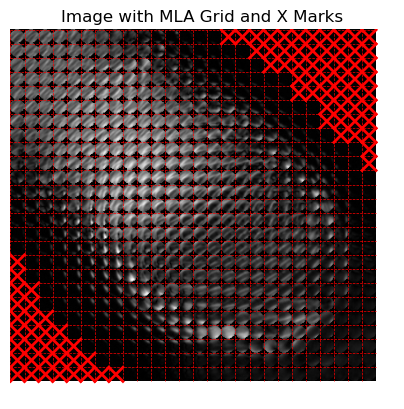

In [23]:
retardance_bottom_portion = masked_retardance[16*55:16*(15+65), 16*41:16*(11+56)]
ret_bottom_portion_lenslet_averages = average_intensity_per_lenslet(retardance_bottom_portion, pix_per_lenslet)
threshold = 400
indices = np.where(ret_bottom_portion_lenslet_averages < threshold)
list_of_indices = list(zip(indices[0], indices[1]))
print(f"Identified {len(list_of_indices)}/{ret_bottom_portion_lenslet_averages.size} lenslets with average intensity less than {threshold}.")
display_image_with_mla_grid_and_x_marks(retardance_bottom_portion, pix_per_lenslet, list_of_indices)

### Motified bottom portion

Identified 94/552 lenslets with average intensity less than 800.


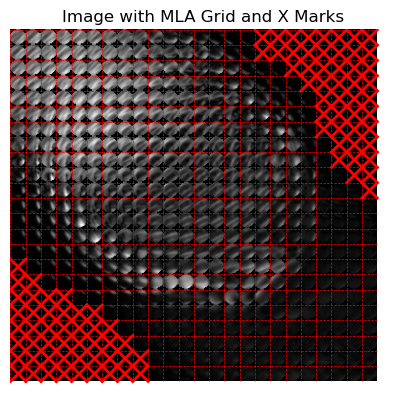

In [24]:
retardance_bottom_portion = masked_retardance[16*60:16*(15+68), 16*45:16*(11+58)]
ret_bottom_portion_lenslet_averages = average_intensity_per_lenslet(retardance_bottom_portion, pix_per_lenslet)
threshold = 800
indices = np.where(ret_bottom_portion_lenslet_averages < threshold)
list_of_indices = list(zip(indices[0], indices[1]))
print(f"Identified {len(list_of_indices)}/{ret_bottom_portion_lenslet_averages.size} lenslets with average intensity less than {threshold}.")
display_image_with_mla_grid_and_x_marks(retardance_bottom_portion, pix_per_lenslet, list_of_indices)

## Make some microlenses be zero
In the lenslets in the background area, we make all the pixels zero.

### Identify lenslet to black out

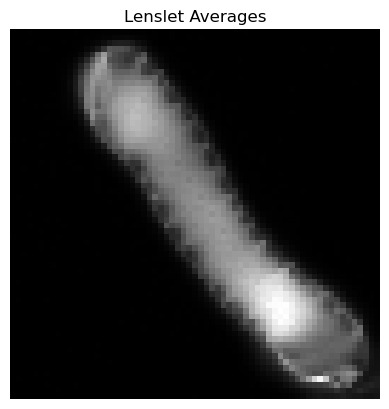

Identified 2668/4225 lenslets with average intensity less than 400.


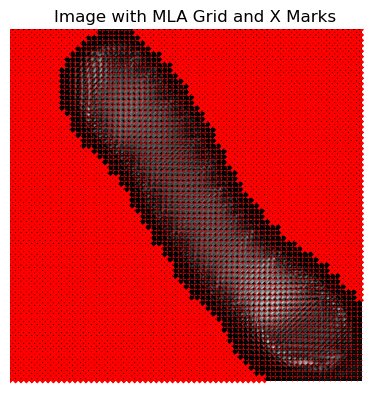

In [25]:
ret_lenslet_averages = average_intensity_per_lenslet(retardance, pix_per_lenslet)
display_image(ret_lenslet_averages, title='Lenslet Averages')
threshold = 400
ths400_indices = np.where(ret_lenslet_averages < threshold)
ths400_list_of_indices = list(zip(ths400_indices[0], ths400_indices[1]))
print(f"Identified {len(ths400_list_of_indices)}/{ret_lenslet_averages.size} lenslets with average intensity less than {threshold}.")
display_image_with_mla_grid_and_x_marks(retardance, pix_per_lenslet, ths400_list_of_indices)

### Black out lenslets
All pixels behind the lenslet indicies found should be made zero.

In [26]:
def zero_regions_in_grid(image_array, pix_per_lenslet, zero_mla_indices):
    """
    Zero out regions within a grid defined by pix_per_lenslet.
    Args:
        image_array (numpy.array): The image array to modify.
        pix_per_lenslet (int): The pixel dimensions of each lenslet in the grid.
        zero_combinations (list of tuples): List of (i, j) tuples where
            i and j are grid indices to be zeroed.
    Returns:
        numpy.array: The modified image array with regions zeroed out.
    """
    height, width = image_array.shape
    modified_image = np.copy(image_array)  # Create a copy to modify
    for i in range(0, height, pix_per_lenslet):
        for j in range(0, width, pix_per_lenslet):
                # Convert pixel index to grid index
                grid_i = i // pix_per_lenslet
                grid_j = j // pix_per_lenslet
                if (grid_i, grid_j) in zero_mla_indices:
                    modified_image[i:i+pix_per_lenslet, j:j+pix_per_lenslet] = 0
    return modified_image

In [27]:
retardance_zeroed = zero_regions_in_grid(retardance, pix_per_lenslet, ths400_list_of_indices)

Verify that the zeroing method worked

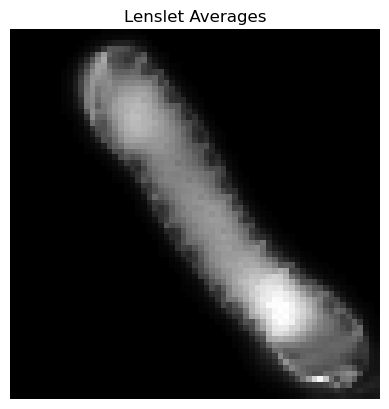

Identified 2668/4225 lenslets with average intensity less than 400.


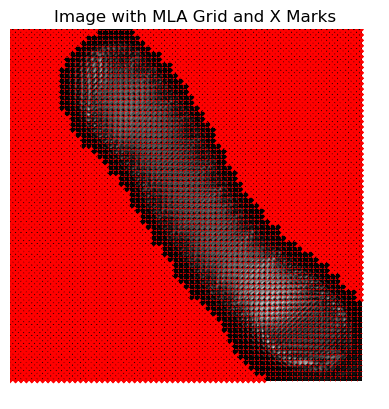

In [28]:
ret_zeroed_lenslet_averages = average_intensity_per_lenslet(retardance_zeroed, pix_per_lenslet)
display_image(ret_zeroed_lenslet_averages, title='Lenslet Averages')
threshold = 400
indices = np.where(ret_zeroed_lenslet_averages < threshold)
list_of_indices = list(zip(indices[0], indices[1]))
print(f"Identified {len(list_of_indices)}/{ret_zeroed_lenslet_averages.size} lenslets with average intensity less than {threshold}.")
display_image_with_mla_grid_and_x_marks(retardance_zeroed, pix_per_lenslet, list_of_indices)

In [29]:
print(f"max: {np.max(ret_zeroed_lenslet_averages)}, min: {np.min(ret_zeroed_lenslet_averages)}")

max: 28191.25390625, min: 0.0


### Save zeroed images

In [30]:
cleaned_img_filenames = [
    'azimuth.tif',
    'retardance.tif',
    'state0.tif',
    'state1.tif',
    'state2.tif',
    'state3.tif',
    'state4.tif'
]
cleaned_img_paths = [os.path.join(cleaned_dir, filename) for filename in cleaned_img_filenames]

In [31]:
for idx, image in enumerate(images):
    zeroed_image = zero_regions_in_grid(image, pix_per_lenslet, ths400_list_of_indices)
    save_image(cleaned_img_paths[idx], zeroed_image)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Geneva\\Documents\\Code\\pol-analyze\\data\\lf_processed_final\\cleaned\\azimuth.tif'